In [3]:
import pandas as pd
import os

# LOAD AND PREPARE THE DATA

**Definitions of every column**

Season	Match Season  
DateTime	Match Date and Time (yyyy-mm-dd hh:mm:ss)  
HomeTeam	Home Team  
AwayTeam	Away Team  
FTHG	Full Time Home Team Goals  
FTAG	Full Time Away Team Goals  
FTR	Full Time Result (H=Home Win, D=Draw, A=Away Win)  
HTHG	Half Time Home Team Goals  
HTAG	Half Time Away Team Goals  
HTR	Half Time Result (H=Home Win, D=Draw, A=Away Win)  
Referee	Match Referee  
HS	Home Team Shots  
AS	Away Team Shots  
HST	Home Team Shots on Target  
AST	Away Team Shots on Target  
HC	Home Team Corners  
AC	Away Team Corners  
HF	Home Team Fouls Committed  
AF	Away Team Fouls Committed  
HY	Home Team Yellow Cards  
AY	Away Team Yellow Cards  
HR	Home Team Red Cards  
AR	Away Team Red Cards  

In [4]:
df = pd.read_csv('results.csv', encoding='latin-1')  
print(df.head())

    Season              DateTime     HomeTeam        AwayTeam  FTHG  FTAG FTR  \
0  1993-94  1993-08-14T00:00:00Z      Arsenal        Coventry     0     3   A   
1  1993-94  1993-08-14T00:00:00Z  Aston Villa             QPR     4     1   H   
2  1993-94  1993-08-14T00:00:00Z      Chelsea       Blackburn     1     2   A   
3  1993-94  1993-08-14T00:00:00Z    Liverpool  Sheffield Weds     2     0   H   
4  1993-94  1993-08-14T00:00:00Z     Man City           Leeds     1     1   D   

   HTHG  HTAG  HTR  ... HST  AST  HC  AC  HF  AF  HY  AY  HR  AR  
0   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
3   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
4   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 23 columns]


## Overall shape/specification/details

In [5]:
print("Dataset shape: ", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nSeasons available:")
print(df['Season'].unique())
print(f"\nDate range: {df['DateTime'].min()} to {df['DateTime'].max()}")

Dataset shape:  (11113, 23)

Column names:
['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']

Data types:
Season       object
DateTime     object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
Referee      object
HS          float64
AS          float64
HST         float64
AST         float64
HC          float64
AC          float64
HF          float64
AF          float64
HY          float64
AY          float64
HR          float64
AR          float64
dtype: object

Missing values per column:
Season         0
DateTime       0
HomeTeam       0
AwayTeam       0
FTHG           0
FTAG           0
FTR            0
HTHG         924
HTAG         924
HTR          924
Referee     2824
HS          2824
AS          2824
HST         2824
AST         2824
HC       

## Conclusion

We can observe that a lot of important data from seasons before 2000 is not available, so we have to cut out these seasons, because we will use more specific statistics than just the score. 

In [6]:
# Filter for seasons 2000 onwards
df_filtered = df[df['Season'] >= '2000-01'].copy()

print(f"Original dataset: {len(df)} matches")
print(f"Filtered dataset (2000+): {len(df_filtered)} matches")
print(f"\nSeasons included: {sorted(df_filtered['Season'].unique())}")

# Check missing values in filtered data
print("\nMissing values in filtered data:")
print(df_filtered.isnull().sum())

# Check data completeness
print(f"\nPercentage of missing values per column:")
print((df_filtered.isnull().sum() / len(df_filtered) * 100).round(2))

# Basic statistics
print(f"\nBasic stats:")
print(f"Total matches: {len(df_filtered)}")
print(f"Unique teams: {len(set(df_filtered['HomeTeam'].unique()) | set(df_filtered['AwayTeam'].unique()))}")
print(f"\nResult distribution:")
print(df_filtered['FTR'].value_counts())
print(f"\nResult percentages:")
print(df_filtered['FTR'].value_counts(normalize=True) * 100)

Original dataset: 11113 matches
Filtered dataset (2000+): 8289 matches

Seasons included: ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']

Missing values in filtered data:
Season      0
DateTime    0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HF          0
AF          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

Percentage of missing values per column:
Season      0.0
DateTime    0.0
HomeTeam    0.0
AwayTeam    0.0
FTHG        0.0
FTAG        0.0
FTR         0.0
HTHG        0.0
HTAG        0.0
HTR         0.0
Referee     0.0
HS          0.0
AS          0.0
HST         0.0
AST         0.0
HC          0.0


Perfect! Now we have the optimal dataset for the model, next we have to prepare it.

In [7]:
df_filtered['DateTime'] = pd.to_datetime(df_filtered['DateTime'])

df_filtered = df_filtered.sort_values('DateTime').reset_index(drop=True)

df_filtered['Year'] = df_filtered['DateTime'].dt.year
df_filtered['Month'] = df_filtered['DateTime'].dt.month
df_filtered['DayOfWeek'] = df_filtered['DateTime'].dt.dayofweek

print("Data prepared! Shape:", df_filtered.shape)
print(df_filtered[['DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']].head(10))

Data prepared! Shape: (8289, 26)
                   DateTime    HomeTeam       AwayTeam  FTHG  FTAG FTR
0 2000-08-19 00:00:00+00:00    Charlton       Man City     4     0   H
1 2000-08-19 00:00:00+00:00     Chelsea       West Ham     4     2   H
2 2000-08-19 00:00:00+00:00    Coventry  Middlesbrough     1     3   A
3 2000-08-19 00:00:00+00:00       Derby    Southampton     2     2   D
4 2000-08-19 00:00:00+00:00       Leeds        Everton     2     0   H
5 2000-08-19 00:00:00+00:00   Leicester    Aston Villa     0     0   D
6 2000-08-19 00:00:00+00:00   Liverpool       Bradford     1     0   H
7 2000-08-19 00:00:00+00:00  Sunderland        Arsenal     1     0   H
8 2000-08-19 00:00:00+00:00   Tottenham        Ipswich     3     1   H
9 2000-08-20 00:00:00+00:00  Man United      Newcastle     2     0   H


# Model

We need to calculate team strength (elo, like in chess) based on past matches

To do that we need to create a function that adds more columns/informations do our dataset based on the matches

In [8]:
def calculate_team_form(df, n_matches=5):

    df_with_features = df.copy()

    # Initialize feature columns
    features_to_add = [
        'home_wins_last_5', 'home_draws_last_5', 'home_losses_last_5',
        'away_wins_last_5', 'away_draws_last_5', 'away_losses_last_5',
        'home_goals_scored_avg', 'home_goals_conceded_avg',
        'away_goals_scored_avg', 'away_goals_conceded_avg',
        'home_points_last_5', 'away_points_last_5'
    ]
    
    for feature in features_to_add:
        df_with_features[feature] = 0.0

    for idx in range(len(df_with_features)):
        if idx % 500 == 0:
            print(f"Processing match {idx}/{len(df_with_features)}")
        
        current_match = df_with_features.iloc[idx]
        home_team = current_match["HomeTeam"]
        away_team = current_match["AwayTeam"]
        current_date = current_match["DateTime"]

        prev_matches = df_with_features[df_with_features['DateTime'] < current_date]

        if len(prev_matches) == 0:
            continue

        home_prev = prev_matches[
            (prev_matches['HomeTeam'] == home_team) |
            (prev_matches['AwayTeam'] == home_team)
        ].tail(n_matches)

        if len(home_prev) > 0:
            home_team_wins = 0
            home_team_draws = 0
            home_team_losses = 0
            home_team_goals_scored = []
            home_team_goals_conceded = []

            for _, match in home_prev.iterrows():
                if match['HomeTeam'] == home_team:
                    # Home team was playing at home
                    goals_scored = match['FTHG']
                    goals_conceded = match['FTAG']
                    result = match['FTR']

                    if result == 'H':
                        home_team_wins += 1
                    elif result == 'D':
                        home_team_draws += 1
                    else:
                        home_team_losses += 1
                
                else:
                    # Home team was playing away
                    goals_scored = match['FTAG']
                    goals_conceded = match['FTHG']
                    result = match['FTR']

                    if result == 'A':
                        home_team_wins += 1
                    elif result == 'D':
                        home_team_draws += 1
                    else:
                        home_team_losses += 1

                home_team_goals_scored.append(goals_scored)
                home_team_goals_conceded.append(goals_conceded)
            
            # Store gained data 
            df_with_features.at[idx, 'home_wins_last_5'] = home_team_wins
            df_with_features.at[idx, 'home_losses_last_5'] = home_team_losses
            df_with_features.at[idx, 'home_draws_last_5'] = home_team_draws
            df_with_features.at[idx, 'home_goals_scored_avg'] = sum(home_team_goals_scored)/len(home_team_goals_scored)
            df_with_features.at[idx, 'home_goals_conceded_avg'] = sum(home_team_goals_conceded)/len(home_team_goals_conceded)
            df_with_features.at[idx, 'home_points_last_5'] = home_team_wins*3 + home_team_draws



        away_prev = prev_matches[
            (prev_matches['HomeTeam'] == away_team) |
            (prev_matches['AwayTeam'] == away_team)
        ].tail(n_matches)


        if len(away_prev) > 0:
            away_team_wins = 0
            away_team_draws = 0
            away_team_losses = 0
            away_team_goals_scored = []
            away_team_goals_conceded = []
            
            for _, match in away_prev.iterrows():
                if match['HomeTeam'] == away_team:
                    goals_scored = match['FTHG']
                    goals_conceded = match['FTAG']
                    result = match['FTR']
                    
                    if result == 'H':
                        away_team_wins += 1
                    elif result == 'D':
                        away_team_draws += 1
                    else:
                        away_team_losses += 1
                else:
                    goals_scored = match['FTAG']
                    goals_conceded = match['FTHG']
                    result = match['FTR']
                    
                    if result == 'A':
                        away_team_wins += 1
                    elif result == 'D':
                        away_team_draws += 1
                    else:
                        away_team_losses += 1
                
                away_team_goals_scored.append(goals_scored)
                away_team_goals_conceded.append(goals_conceded)
            
            # Store away team features
            df_with_features.at[idx, 'away_wins_last_5'] = away_team_wins
            df_with_features.at[idx, 'away_draws_last_5'] = away_team_draws
            df_with_features.at[idx, 'away_losses_last_5'] = away_team_losses
            df_with_features.at[idx, 'away_goals_scored_avg'] = sum(away_team_goals_scored) / len(away_team_goals_scored)
            df_with_features.at[idx, 'away_goals_conceded_avg'] = sum(away_team_goals_conceded) / len(away_team_goals_conceded)
            df_with_features.at[idx, 'away_points_last_5'] = away_team_wins * 3 + away_team_draws
    
    print("Feature engineering complete!")
    return df_with_features

## Feature Engineering Function

This function calculates rolling team performance statistics based on their last N matches. For each match in the dataset, it looks back at historical data (only matches that occurred before the current match) and computes form indicators for both the home and away teams.

### Features Calculated (per team):
- **Wins/Draws/Losses**: Count of results in last 5 matches
- **Points**: Total points earned (3 for win, 1 for draw, 0 for loss)
- **Goals Scored Average**: Mean goals scored per match
- **Goals Conceded Average**: Mean goals conceded per match

### Key Implementation Details:
- **No lookahead bias**: Only uses data from matches that occurred before the current match date
- **Handles both home and away**: Tracks team performance regardless of venue
- **Flexible window**: Can adjust `n_matches` parameter (default is 5 matches)
- **Skips early matches**: Matches without sufficient history are left with default values (0.0)

### Parameters:
- `df`: DataFrame containing match results with columns: DateTime, HomeTeam, AwayTeam, FTHG, FTAG, FTR
- `n_matches`: Number of previous matches to consider for rolling statistics (default: 5)

### Returns:
DataFrame with original columns plus 12 new feature columns (6 for home team, 6 for away team)

### Usage:
```python
df_features = calculate_team_form(df_filtered, n_matches=5)
```

### Note:
This function can take several minutes to run on large datasets as it processes each match sequentially to maintain temporal integrity.

In [19]:
def calculate_elo_ratings(df, k_factor=20):
    all_teams = set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique())

    elo_ratings = {team: 1500 for team in all_teams}
    df['HomeElo'] = 0.0
    df['AwayElo'] = 0.0

    for index, row in df.iterrows():
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']

        result = row['FTR']

        current_home_elo = elo_ratings[home_team]
        current_away_elo = elo_ratings[away_team]

        df.at[index, 'HomeElo'] = current_home_elo
        df.at[index, 'AwayElo'] = current_away_elo

        expected_home_win_prob = 1 / (1 + 10**((current_away_elo - current_home_elo) / 400))

        if result == 'H':
            actual_score_home = 1
        elif result == 'D':
            actual_score_home = 0.5
        else:
            actual_score_home = 0

        
        new_home_elo = current_home_elo + k_factor * (actual_score_home - expected_home_win_prob)
        new_away_elo = current_away_elo + k_factor * ((1-actual_score_home) - (1 - expected_home_win_prob))

        elo_ratings[home_team] = new_home_elo
        elo_ratings[away_team] = new_away_elo
    return df


df_filtered = calculate_elo_ratings(df_filtered)

print(df_filtered[['DateTime', 'HomeTeam', 'AwayTeam', 'HomeElo', 'AwayElo']].tail())


                      DateTime     HomeTeam        AwayTeam      HomeElo  \
8284 2022-04-09 17:30:00+00:00  Aston Villa       Tottenham  1520.252332   
8285 2022-04-10 14:00:00+00:00    Leicester  Crystal Palace  1598.579579   
8286 2022-04-10 14:00:00+00:00      Norwich         Burnley  1369.285825   
8287 2022-04-10 14:00:00+00:00    Brentford        West Ham  1494.634157   
8288 2022-04-10 16:30:00+00:00     Man City       Liverpool  1822.609535   

          AwayElo  
8284  1651.429641  
8285  1549.652696  
8286  1495.719992  
8287  1617.776881  
8288  1798.527512  


In [20]:
df_features = calculate_team_form(df_filtered, n_matches=5)

# Check if any features are non-zero
# print("\nSum of home_points_last_5:", df_features['home_points_last_5'].sum())
# print("Max of home_points_last_5:", df_features['home_points_last_5'].max())

print("\n Features created:")
print(df_features[['HomeTeam', 'AwayTeam', 'FTR', 'home_points_last_5', 
                    'away_points_last_5', 'home_goals_scored_avg', 
                    'away_goals_scored_avg']].tail(20))

Processing match 0/8289
Processing match 500/8289
Processing match 1000/8289
Processing match 1500/8289
Processing match 2000/8289
Processing match 2500/8289
Processing match 3000/8289
Processing match 3500/8289
Processing match 4000/8289
Processing match 4500/8289
Processing match 5000/8289
Processing match 5500/8289
Processing match 6000/8289
Processing match 6500/8289
Processing match 7000/8289
Processing match 7500/8289
Processing match 8000/8289
Feature engineering complete!

 Features created:
            HomeTeam        AwayTeam FTR  home_points_last_5  \
8269           Leeds     Southampton   D                 6.0   
8270          Wolves     Aston Villa   H                 6.0   
8271         Chelsea       Brentford   A                15.0   
8272         Burnley        Man City   A                 4.0   
8273        Brighton         Norwich   D                 0.0   
8274      Man United       Leicester   D                10.0   
8275        West Ham         Everton   H       

In [21]:
valid_matches = df_features[df_features['home_points_last_5'] > 0].shape[0]
print(f"\nMatches with valid features: {valid_matches} out of {len(df_features)}")

df_clean = df_features[
    (df_features['home_points_last_5'] > 0) | 
    (df_features['away_points_last_5'] > 0)
].copy()

print(f"Clean dataset size: {len(df_clean)} matches")


Matches with valid features: 8108 out of 8289
Clean dataset size: 8270 matches


In [22]:
# Check the features
print("Feature summary:")
print(df_features[['home_points_last_5', 'away_points_last_5', 
                    'home_goals_scored_avg', 'away_goals_scored_avg']].describe())

# Check how many matches have valid features (non-zero history)
valid_matches = df_features[df_features['home_points_last_5'] > 0].shape[0]
print(f"\nMatches with valid features: {valid_matches} out of {len(df_features)}")

# Remove matches without historical data (early season matches)
df_clean = df_features[
    (df_features['home_points_last_5'] > 0) | 
    (df_features['away_points_last_5'] > 0)
].copy()

print(f"Clean dataset size: {len(df_clean)} matches")
print(f"\nResult distribution in clean data:")
print(df_clean['FTR'].value_counts(normalize=True) * 100)

Feature summary:
       home_points_last_5  away_points_last_5  home_goals_scored_avg  \
count         8289.000000         8289.000000            8289.000000   
mean             6.716974            6.954035               1.317503   
std              3.427933            3.399826               0.639929   
min              0.000000            0.000000               0.000000   
25%              4.000000            4.000000               0.800000   
50%              7.000000            7.000000               1.200000   
75%              9.000000            9.000000               1.600000   
max             15.000000           15.000000               5.800000   

       away_goals_scored_avg  
count            8289.000000  
mean                1.352194  
std                 0.647633  
min                 0.000000  
25%                 0.800000  
50%                 1.200000  
75%                 1.800000  
max                 4.800000  

Matches with valid features: 8108 out of 8289
Clean da

In [29]:
df_clean['EloDifference'] = df_clean['HomeElo'] - df_clean['AwayElo']
df_clean['PointsDifference'] = df_clean['home_points_last_5'] - df_clean['away_points_last_5']

# Select feature columns for the model
feature_columns = [
    'home_wins_last_5', 'home_draws_last_5', 'home_losses_last_5',
    'away_wins_last_5', 'away_draws_last_5', 'away_losses_last_5',
    'home_goals_scored_avg', 'home_goals_conceded_avg',
    'away_goals_scored_avg', 'away_goals_conceded_avg',
    'home_points_last_5', 'away_points_last_5', 'PointsDifference',
    'HomeElo', 'AwayElo', 'EloDifference'
]

X = df_clean[feature_columns]
y = df_clean['FTR']  # H, D, or A

print("Features shape:", X.shape)
print("Target distribution:")
print(y.value_counts())

Features shape: (8270, 16)
Target distribution:
FTR
H    3793
A    2413
D    2064
Name: count, dtype: int64


In [30]:
split_date = '2019-01-01'  # Adjust based on your data range

train_data = df_clean[df_clean['DateTime'] < split_date]
test_data = df_clean[df_clean['DateTime'] >= split_date]

X_train = train_data[feature_columns]
y_train = train_data['FTR']
X_test = test_data[feature_columns]
y_test = test_data['FTR']

print(f"Training set: {len(X_train)} matches")
print(f"Test set: {len(X_test)} matches")
print(f"\nTraining date range: {train_data['DateTime'].min()} to {train_data['DateTime'].max()}")
print(f"Test date range: {test_data['DateTime'].min()} to {test_data['DateTime'].max()}")

Training set: 7024 matches
Test set: 1246 matches

Training date range: 2000-08-21 00:00:00+00:00 to 2018-12-30 00:00:00+00:00
Test date range: 2019-01-01 00:00:00+00:00 to 2022-04-10 16:30:00+00:00


Now we can implement the random forest using prepared data

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


rf_model = RandomForestClassifier(
    n_estimators=100, # number of trees in the forest
    max_depth=10, # maximum depth of each tree
    min_samples_split=20, # minimum samples required to split the node
    # random_state=42, # for reproducibility
    n_jobs=-1 # all cores
    
)

print("Training Random Forest model...")
rf_model.fit(X_train, y_train)
print("Training completed!")

# make a prediction on test set
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
baseline_accuracy = (y_test == "H").mean() # always predict home win

print(f"\n{'='*50}")
print(f"MODEL PERFORMANCE")
print(f"{'='*50}")
print(f"Test Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"Baseline (always predict Home): {baseline_accuracy:.3f} ({baseline_accuracy*100:.1f}%)")
print(f"Improvement: {(accuracy - baseline_accuracy)*100:.1f}%")

# Detailed classification report
print(f"\n{'='*50}")
print(f"CLASSIFICATION REPORT")
print(f"{'='*50}")
print(classification_report(y_test, y_pred, target_names=['Away Win', 'Draw', 'Home Win']))

# Confusion Matrix
print(f"\n{'='*50}")
print(f"CONFUSION MATRIX")
print(f"{'='*50}")
cm = confusion_matrix(y_test, y_pred, labels=['A', 'D', 'H'])
print("              Predicted")
print("              A    D    H")
print(f"Actual A    {cm[0][0]:4d} {cm[0][1]:4d} {cm[0][2]:4d}")
print(f"       D    {cm[1][0]:4d} {cm[1][1]:4d} {cm[1][2]:4d}")
print(f"       H    {cm[2][0]:4d} {cm[2][1]:4d} {cm[2][2]:4d}")



Training Random Forest model...
Training completed!

MODEL PERFORMANCE
Test Accuracy: 0.530 (53.0%)
Baseline (always predict Home): 0.429 (42.9%)
Improvement: 10.1%

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Away Win       0.56      0.48      0.51       434
        Draw       0.33      0.03      0.06       277
    Home Win       0.52      0.83      0.64       535

    accuracy                           0.53      1246
   macro avg       0.47      0.45      0.41      1246
weighted avg       0.49      0.53      0.47      1246


CONFUSION MATRIX
              Predicted
              A    D    H
Actual A     207   10  217
       D      82    9  186
       H      82    8  445


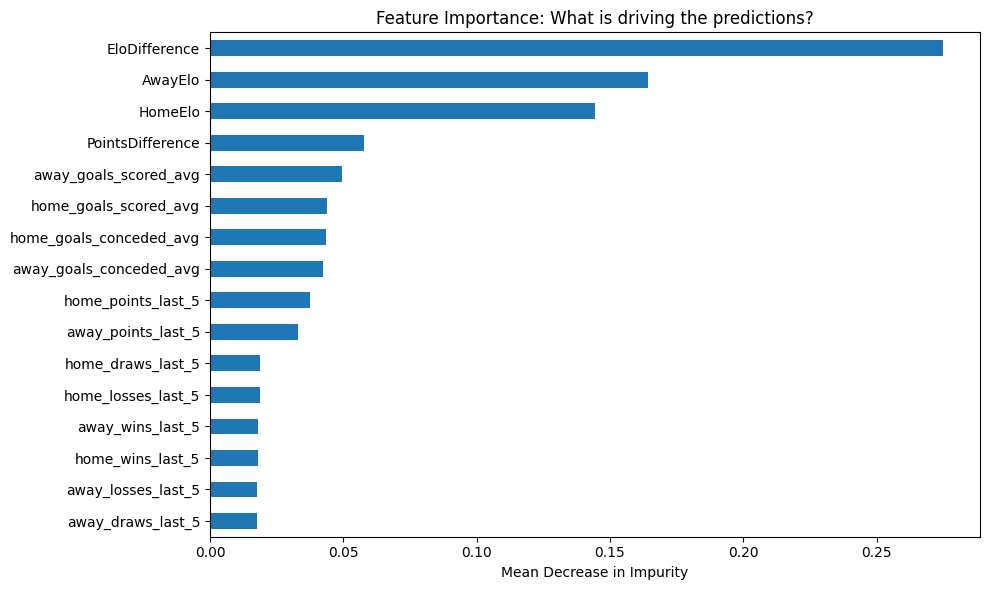

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from your trained Random Forest
importances = rf_model.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

# Sort and plot
fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.sort_values(ascending=True).plot.barh(ax=ax)
ax.set_title("Feature Importance: What is driving the predictions?")
ax.set_xlabel("Mean Decrease in Impurity")
fig.tight_layout()
plt.show()

# Using XGBoost 

Now we will use XGBoost, this model will learn from previous mistakes and hopefully improve our results

In [50]:

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# 2. Prepare the Data specifically for XGBoost
# XGBoost requires the target to be integers: 0, 1, 2
label_mapping = {'A': 0, 'D': 1, 'H': 2}
reverse_mapping = {0: 'Away', 1: 'Draw', 2: 'Home'}

y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

clf = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.01,
    max_depth=3,
    objective='multi:softprob',
    n_jobs=-1
)

print("Training XGBoost...")
clf.fit(X_train, y_train_encoded)

y_pred_encoded = clf.predict(X_test)

y_pred_names = [reverse_mapping[val] for val in y_pred_encoded]
y_test_names = [reverse_mapping[val] for val in y_test_encoded]

# 5. Evaluate
acc = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"XGBoost Accuracy: {acc:.3f} ({acc*100:.1f}%)")
print("\nClassification Report:")
print(classification_report(y_test_names, y_pred_names))

Training XGBoost...
XGBoost Accuracy: 0.534 (53.4%)

Classification Report:
              precision    recall  f1-score   support

        Away       0.56      0.50      0.53       434
        Draw       0.00      0.00      0.00       277
        Home       0.52      0.84      0.64       535

    accuracy                           0.53      1246
   macro avg       0.36      0.45      0.39      1246
weighted avg       0.42      0.53      0.46      1246



/home/FAZ1/.local/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/FAZ1/.local/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/FAZ1/.local/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [48]:
from sklearn.model_selection import GridSearchCV

# 1. Define the grid of hyperparameters to test
param_grid = {
    'max_depth': [3, 4, 5],           # Keep trees shallow to avoid overfitting
    'n_estimators': [50, 100, 200],   # Try different numbers of trees
    'learning_rate': [0.01, 0.05, 0.1] # How fast the model learns
}

# 2. Setup the Grid Search
xgb_model = xgb.XGBClassifier(objective='multi:softprob', random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # Cross-validation (splits data 3 ways to ensure consistency)
    verbose=1
)

print("Searching for best hyperparameters...")
grid_search.fit(X_train, y_train_encoded)

# 3. Print Results
print(f"\nBest Parameters found: {grid_search.best_params_}")
print(f"Best Training Accuracy: {grid_search.best_score_:.3f}")

# 4. Test the best model on the Test Set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
acc_best = accuracy_score(y_test_encoded, y_pred_best)

print(f"Test Set Accuracy with optimized params: {acc_best:.3f} ({acc_best*100:.1f}%)")

Searching for best hyperparameters...
Fitting 3 folds for each of 27 candidates, totalling 81 fits

Best Parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best Training Accuracy: 0.534
Test Set Accuracy with optimized params: 0.534 (53.4%)


## Draw problem

The model is currently fullt ignoring draws and gets 53.4% accuracy which is good, but I prefer the model that includes draws cousing less accuracy, we have to balance class_weights to treat draws more serious

In [51]:
from sklearn.utils.class_weight import compute_sample_weight

# 1. Calculate weights to balance the classes
# This automatically gives higher weight to rare events (Draws)
train_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train_encoded
)

# 2. Re-initialize your model with the "Best" parameters you found
clf_balanced = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.01,
    max_depth=3,
    objective='multi:softprob',
    random_state=42,
    n_jobs=-1
)

print("Training with Class Balancing...")
# 3. Pass the weights to the fit function!
clf_balanced.fit(
    X_train, 
    y_train_encoded, 
    sample_weight=train_weights  # <--- This is the magic key
)

# 4. Predict and Evaluate
y_pred_balanced = clf_balanced.predict(X_test)
y_pred_balanced_names = [reverse_mapping[val] for val in y_pred_balanced]

print("\n=== Balanced XGBoost Report ===")
print(classification_report(y_test_names, y_pred_balanced_names))

Training with Class Balancing...

=== Balanced XGBoost Report ===
              precision    recall  f1-score   support

        Away       0.56      0.53      0.54       434
        Draw       0.26      0.29      0.27       277
        Home       0.60      0.60      0.60       535

    accuracy                           0.50      1246
   macro avg       0.47      0.47      0.47      1246
weighted avg       0.51      0.50      0.51      1246



We got 50% accuracy with draws included which is great!!

In [52]:
import pandas as pd
import numpy as np

# Get probabilities from your new 'clf_balanced' model
probs = clf_balanced.predict_proba(X_test)

# Get the max probability (confidence) and the predicted class for each game
max_probs = np.max(probs, axis=1)
predictions = clf_balanced.predict(X_test)

# Create a DataFrame to analyze performance
analysis = pd.DataFrame({
    'Actual': y_test_encoded,
    'Predicted': predictions,
    'Confidence': max_probs,
    'Result_Name': [reverse_mapping[x] for x in y_test_encoded]
})

analysis['Correct'] = analysis['Actual'] == analysis['Predicted']

print("=== Accuracy at different Confidence Levels ===")
for threshold in [0.40, 0.50, 0.60, 0.70]:
    # Select only matches where model confidence > threshold
    subset = analysis[analysis['Confidence'] > threshold]
    
    if len(subset) > 0:
        acc = subset['Correct'].mean()
        print(f"Confidence > {threshold:.2f}: {acc*100:.1f}% Accuracy (on {len(subset)} matches)")
    else:
        print(f"Confidence > {threshold:.2f}: No matches found")

# Let's peek at high-confidence bets
print("\n=== Example High Confidence Predictions ===")
print(analysis[analysis['Confidence'] > 0.60].head(5))

=== Accuracy at different Confidence Levels ===
Confidence > 0.40: 60.6% Accuracy (on 789 matches)
Confidence > 0.50: 69.9% Accuracy (on 382 matches)
Confidence > 0.60: 77.1% Accuracy (on 157 matches)
Confidence > 0.70: 100.0% Accuracy (on 2 matches)

=== Example High Confidence Predictions ===
      Actual  Predicted  Confidence Result_Name  Correct
7041       2          2    0.628287        Home     True
7042       0          0    0.611435        Away     True
7044       1          2    0.615895        Draw    False
7059       2          2    0.630772        Home     True
7062       2          2    0.643248        Home     True
